# Titanic: who survived?
by Fabian Stadler

### Steps:
__1 - Preprocessing and exploring__
<br/>    1.1 - Load the data sets
<br/>    1.2 - Explore the training data
<br/>    1.3 - How to handle missing values in Age?
<br/>    1.4 - Derive additional feature FamilySize
<br/>    1.5 - Conclude feature engineering
<br/><br/>
__2 - Train and Test three different models: Random Forest, SVM and k-Nearest Neighbors__

__3 - Submission__
    
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 1. Preprocessing and exploring

## 1.1 Load datasets

In [3]:

# Import data from CSV files train.csv and test.csv into separate pandas DataFrames. Combine both into one frame (for exploration).
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
combined_data = pd.concat([train_data, test_data], sort= False)
combined_data.tail() 
## combined_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
len_train=train_data.shape[0]
print(len_train)


891


# 1.2 Explore the training data

In [7]:

# Find missing values in train set
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
# Find missing values in test set
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [9]:
# Fare: fill missing value with mean
test_data.Fare = test_data.Fare.fillna(combined_data.Fare.mean()) 
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Age       86
Cabin    327
dtype: int64

In [10]:
# Cabin
# replace with 'unknown' in both data sets
train_data.Cabin = train_data.Cabin.fillna('unknown')
test_data.Cabin = test_data.Cabin.fillna('unknown')

In [11]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]
# train_data.isnull().sum()[train_data.isnull().sum() > 0] 

Age    86
dtype: int64

In [12]:
# Embarked - fill it in with mode from Embarked data 
train_data.Embarked.mode()[0]

'S'

In [13]:
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode()[0])

In [14]:
train_data.isnull().sum()[train_data.isnull().sum() > 0] 

Age    177
dtype: int64

Text(0.5, 1.0, 'Correlation of Cabin')

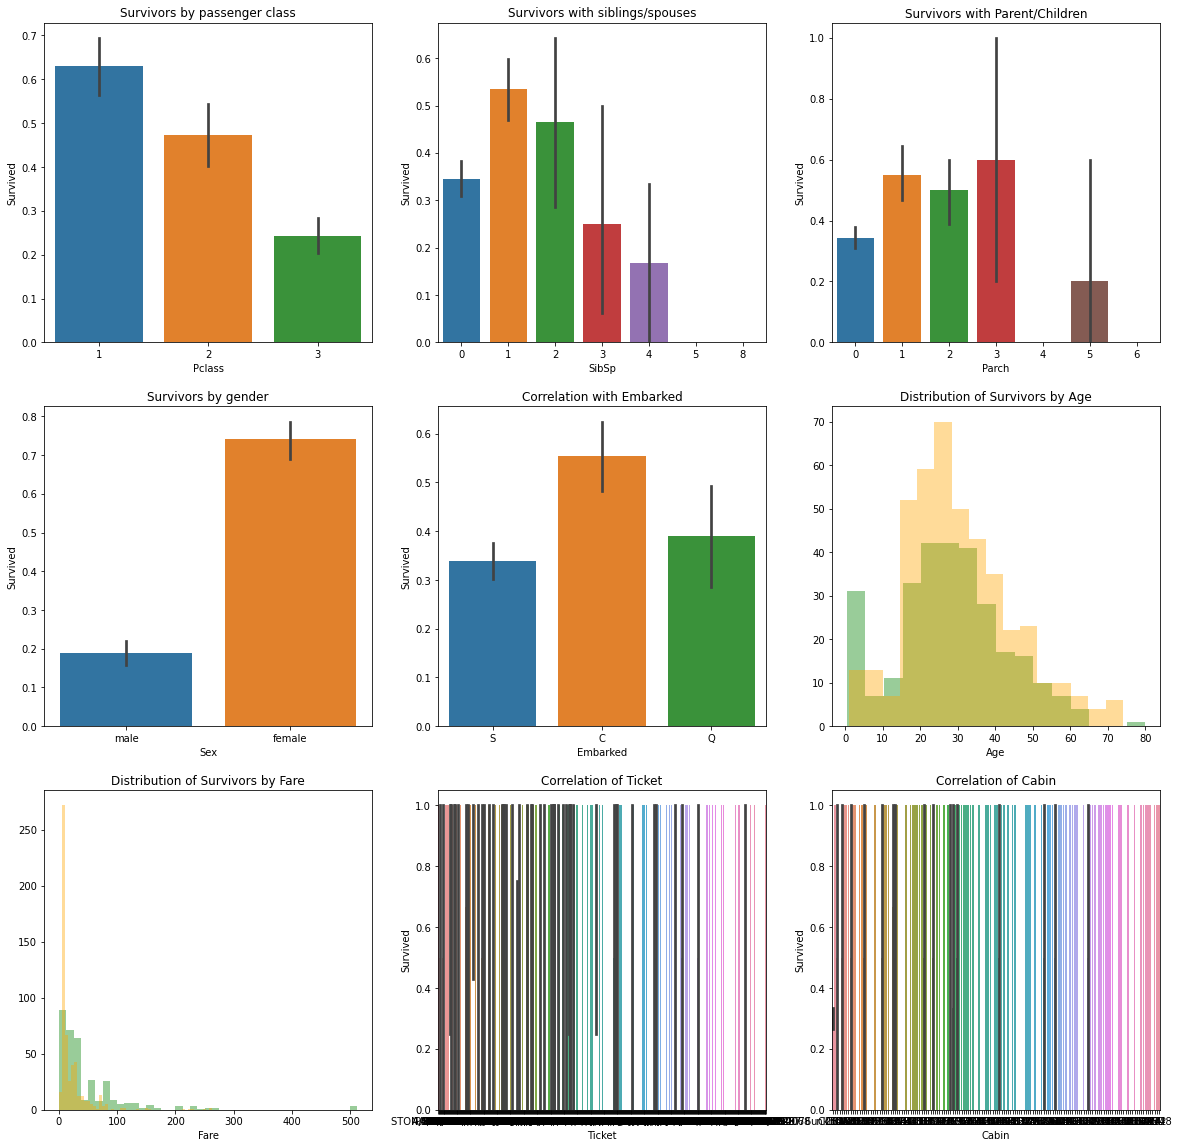

In [15]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[20,20])
plt.subplot(331) # nrows, ncols, index,
sns.barplot('Pclass','Survived',data = train_data).set_title("Survivors by passenger class")
plt.subplot(332)
sns.barplot('SibSp','Survived',data = train_data).set_title("Survivors with siblings/spouses")
plt.subplot(333)
sns.barplot('Parch', 'Survived', data = train_data).set_title("Survivors with Parent/Children")
plt.subplot(334)
sns.barplot('Sex','Survived',data = train_data).set_title("Survivors by gender")
plt.subplot(335)
sns.barplot('Embarked','Survived',data = train_data).set_title("Correlation with Embarked")
plt.subplot(336)
sns.distplot(train_data[train_data.Survived==1].Age.dropna(), color='green', kde=False).set_title("Distribution of Survivors by Age")
sns.distplot(train_data[train_data.Survived==0].Age.dropna(), color='orange', kde=False)
plt.subplot(337)
sns.distplot(train_data[train_data.Survived==1].Fare.dropna(), color='green', kde=False).set_title("Distribution of Survivors by Fare")
sns.distplot(train_data[train_data.Survived==0].Fare.dropna(), color='orange', kde=False)
# Better options for visualization?
plt.subplot(338)
sns.barplot('Ticket', 'Survived', data = train_data).set_title("Correlation of Ticket") 
plt.subplot(339)
sns.barplot('Cabin', 'Survived', data = train_data).set_title("Correlation of Cabin")

## ? possible to group columns by range, i.e. from 1-10 | 11-20 | ... for Fare and Age
## Other visualization options for Ticket/Cabin? even when these are not that relevant
# sns.barplot('Ticket', 'Survived', data = train_data).set_title("Correlation of Ticket") 
# sns.barplot('Cabin', 'Survived', data = train_data).set_title("Correlation of Cabin")

## Findings from Data exploration
1. Most passengers in 1st and 2nd class survived, while most in 3rd class died, as well confirmed by the Fare correlation
1. Most female passengers (70%) survived, while most men died
1. SibSp and Parch don't seem to have a clear relationship with the target, but putting them together can be a good idea (see later on).
1. For Ticket and Cabin we don't see any relation, so let's forget about them.
1. Most survivors embarked in Cherbourg ('C')
1. Age matters! Passengers between 15 and 35 had the best chances to survive. However, there is a lot of Ages missing (250 across both sets). See next chapter how to handle this

# 1.3 - How to handle missing values in 'Age' ?

From looking on the values and possible correlations, Age definitively will have a correlation to 'Survived', so we need to find a way to handle the missing values in 'Age'. Inspired by: https://www.kaggle.com/sedrak/titanic-survivals-with-age-prediction we predict the missing 'Ages' with a RandomForestClassifier instead of simply impute them with mean or median.

In [16]:
# better visualization with age categorization
## bins = [-1, 0, 13, 20, 35, 60, np.inf] #  np.inf = positive infinity
## labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
## train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
## test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

#fillna from AgeGroup
## train_data["AgeGroup"] = train_data["AgeGroup"].fillna('Unknown')
## test_data["AgeGroup"] = test_data["AgeGroup"].fillna('Unknown')


In [17]:
#draw a bar plot of AgeGroup vs. survival
## plt.figure(figsize=[20,15])
## plt.subplot(221)
## sns.barplot('AgeGroup','Survived',data = train_data).set_title("Survivors by Age Group")
## plt.subplot(222)
## sns.distplot(train_data[train_data.Survived==1].Age.dropna(), color='green', kde=False).set_title("Distribution of Survivors by Age")
## sns.distplot(train_data[train_data.Survived==0].Age.dropna(), color='orange', kde=False)

In [18]:
## train_data.groupby(['AgeGroup']).Age.mean()

In [19]:
## train_data.groupby(['AgeGroup']).AgeGroup.count()

The 'Title' in the name indicates a certain age group and a certain social level as well as gender, so we introduce this as a derived feature from 'Name'. We will just classify the titles a bit before, as there is many titles indicating same age, gender and social group. Defined classes are: Officer (=male, adult), Royalty, Mrs (=female, adult), Miss (=female, junior adult), Mr (=male, adult), Master (child, infant)

In [20]:
# split the name to extract title, how it works: 
# passangersName = Spector, Mr. Woolf
# splitName1     = passangersName.split('.') = [Spector, Mr],[ Woolf]
# splitName2     = splitName1[0].split(',')     = [Spector],[ Mr]
# title          = splitName2[1].strip() = 'Mr'

train_data['Title'] = train_data.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test_data['Title']  = test_data.Name.apply( lambda x: x.split('.')[0].split(',')[1].strip())

test_data['Title']


0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [21]:
# Reduce titles to the 6 most common titles:
# Dictionary : https://docs.python.org/3/tutorial/datastructures.html#dictionaries
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

# how map works with a dictionary as argunment : https://docs.python.org/3/library/stdtypes.html#typesmapping
# train_data.Title.map(newtitles) 
# if the first value in the column Title is "Capt", the first map iteration would be: 
# newtitles["Capt"], and return the value for the key "Cap" which is "Officer", so the value of that cell will be replaced by "Officer"
train_data['Title'] = train_data.Title.map(newtitles)
test_data['Title'] = test_data.Title.map(newtitles)

In [22]:
# replacements for Age if we would use the mean per group of Title and gender.
train_data.groupby(['Title', 'Sex']).Age.mean()

Title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

When classifying, unlabeled Strings have to be converted to numerical in order to build classified, labeled data, so we map our newly created titles, as well as 'Embarked' and 'Sex' to categorical numeric data

In [23]:
# When classifying, convert unlabeled Strings to numerical values
# map Titles, Embarked, Sex and AgeGroup to categorical numeric data
title_mapping    = {'Master': 1, 'Miss':2,"Mr": 3, "Mrs": 4, "Officer":5, "Royalty":6}
embarked_mapping = {'S': 1, 'C':2, 'Q': 3, '': 0}
gender_mapping   = {'male': 0, 'female': 1}
## agegroup_mapping = {'Unknown': 0,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5  }

#map train_data to replace string with a numeric value for Title, Embarked and Gender
train_data['Title']     = train_data.Title.map(title_mapping)
train_data['Embarked']  = train_data.Embarked.map(embarked_mapping)
train_data['Sex']       = train_data.Sex.map(gender_mapping)
## train_data['AgeGroup']  = train_data.AgeGroup.map(agegroup_mapping)
 
#map test_data to replace string with a numeric value
test_data['Title']    = test_data.Title.map(title_mapping)
test_data['Embarked'] = test_data.Embarked.map(embarked_mapping)
test_data['Sex']      = test_data.Sex.map(gender_mapping)
## test_data['AgeGroup']  = test_data.AgeGroup.map(agegroup_mapping)

In [24]:
#cast to int
## train_data = train_data.astype({'Title': 'int32', 'Embarked' : 'int32', 'Sex' : 'int32', 'AgeGroup' : 'int32'})
train_data = train_data.astype({'Title': 'int32', 'Embarked' : 'int32', 'Sex' : 'int32'})
## test_data  = test_data.astype({'Title': 'int32', 'Embarked' : 'int32', 'Sex' : 'int32', 'AgeGroup' : 'int32'})
test_data  = test_data.astype({'Title': 'int32', 'Embarked' : 'int32', 'Sex' : 'int32'})

# check dataset
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,unknown,3,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,unknown,1,4
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,unknown,3,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,unknown,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,unknown,1,4


As said before, we try a more sophisticated approach by predicting each missing Age value individually with a RandomForestClassifier. To train the classifier, we combine train and test dataset, we drop all columns not necessary and clean all NaN.

In [25]:
train_age = pd.concat([train_data, test_data], sort = False).drop(['PassengerId','Survived','SibSp','Parch','Ticket','Fare','Cabin','Name'], axis =1).dropna()
train_age = train_age.astype({'Age': 'int32'})
train_age.head(10)

,Pclass,Sex,Age,Embarked,Title
0,3,0,22,1,3
1,1,1,38,2,4
2,3,1,26,1,2
3,1,1,35,1,4
4,3,0,35,1,3
6,1,0,54,1,3
7,3,0,2,1,1
8,3,1,27,1,4
9,2,1,14,2,4
10,3,1,4,1,2


Now we train the Random Forest Classifier with this dataset.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, criterion='gini',random_state=1)
train_age_X = train_age.drop(['Age'],axis = 1)
train_age_y = train_age['Age']
rf.fit(train_age_X, train_age_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [27]:
train_predict = train_data.drop(['PassengerId','Survived','SibSp','Parch','Ticket','Fare','Cabin','Name','Age'],axis=1)
train_data['Age_predicted'] = rf.predict(train_predict)
test_predict = test_data.drop(['PassengerId','SibSp','Parch','Ticket','Fare','Cabin','Name','Age'],axis=1)
test_data['Age_predicted'] = rf.predict(test_predict)

In [28]:
train_data[np.isnan(train_data.Age)].head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_predicted
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,unknown,3,3,21
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,unknown,1,3,34
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,unknown,2,4,45
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,unknown,2,3,22
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,unknown,3,2,18
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,unknown,1,3,21
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,2,4,48
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,unknown,3,2,18
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,unknown,2,3,22
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,unknown,2,3,22


In [29]:
test_data[np.isnan(test_data.Age)].head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_predicted
10,902,3,"Ilieff, Mr. Ylio",0,NaN,0,0,349220,7.8958,unknown,1,3,21
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,PC 17598,31.6833,unknown,1,4,35
29,921,3,"Samaan, Mr. Elias",0,NaN,2,0,2662,21.6792,unknown,2,3,22
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,1,2,W./C. 6607,23.4500,unknown,1,4,26
36,928,3,"Roth, Miss. Sarah A",1,NaN,0,0,342712,8.0500,unknown,1,2,22
39,931,3,"Hee, Mr. Ling",0,NaN,0,0,1601,56.4958,unknown,1,3,21
41,933,1,"Franklin, Mr. Thomas Parham",0,NaN,0,0,113778,26.5500,D34,1,3,42
47,939,3,"Shaughnessy, Mr. Patrick",0,NaN,0,0,370374,7.7500,unknown,3,3,21
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",0,NaN,0,0,SC/A.3 2861,15.5792,unknown,2,3,29
58,950,3,"Davison, Mr. Thomas Henry",0,NaN,1,0,386525,16.1000,unknown,1,3,21


In [30]:
# Refresh AgeGroup
## bins = [-1, 13, 20, 35, 60, np.inf] #  np.inf = positive infinity
## labels = ['0', '1', '2', '3', '4']
## train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
## test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)


In [31]:
#draw a bar plot of AgeGroup vs. survival
## plt.figure(figsize=[20,15])
## plt.subplot(221)
## sns.barplot('AgeGroup','Survived',data = train_data).set_title("Survivors by Age Group")
## plt.subplot(222)
## sns.distplot(train_data[train_data.Survived==1].Age.dropna(), color='green', kde=False).set_title("Distribution of Survivors by Age")
## sns.distplot(train_data[train_data.Survived==0].Age.dropna(), color='orange', kde=False)

## 1.4 Derive additional Feature FamilySize

When exploring the data we recognized, that SibSp and Parch do not have a strong correlation to Survived. Nevertheless, families on board had a higher chance to survive than a single person, because of the rule "women and children first". See the statistical evidence here on the new feature FamilySize:

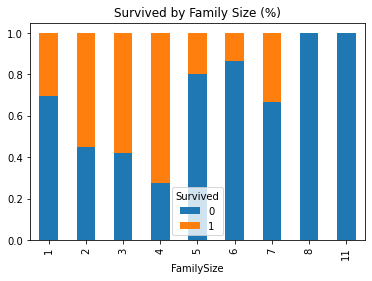

In [32]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize']  = test_data['SibSp']  + test_data['Parch']  + 1

pd.crosstab(train_data['FamilySize'], train_data['Survived'], normalize='index').plot(kind = 'bar', stacked = True, title = 'Survived by Family Size (%)')


Families with 2-4 members have survived and will use FamilySize as an additional features for prediction.

## 1.5 - Conclude Feature Engineering
After exploring the data, we have already seen that the following columns can help us a features for a model:

* Pclass
* Sex (gender)
* Embarked
* Age For Age we solved the issue of missing values by predicting them based on a model that was trained with the available data. 
* 'FamilySize', new feature based on SibSp and Parch.


Hence, now we drop all other features that will not help us. PassengerID we will also drop for training a model, but will add it again later for submission.

In [33]:
## train_data.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare','Ticket','Cabin','Age', 'AgeGroup'],axis=1,inplace=True)
## test_data.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare','Ticket','Cabin','Age', 'AgeGroup'],axis=1,inplace=True)
train_data.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare','Ticket','Cabin','Age'],axis=1,inplace=True)
test_data.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare','Ticket','Cabin','Age'],axis=1,inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Embarked,Title,Age_predicted,FamilySize
0,0,3,0,1,3,21,2
1,1,1,1,2,4,48,2
2,1,3,1,1,2,22,1
3,1,1,1,1,4,35,2
4,0,3,0,1,3,21,1
5,0,3,0,3,3,21,1
6,0,1,0,1,3,42,1
7,0,3,0,1,1,9,5
8,1,3,1,1,4,26,3
9,1,2,1,2,4,24,2


## 2 - Train and Test three different models: Random Forest, SVM and k-Nearest Neighbors

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

train_survival_X = train_data.drop(['Survived'],axis=1)
train_survival_y = train_data['Survived']

## Random Forest

This one is known from the age prediction. Random Forest produces a 'forest' of decision trees to finally rate them and select best matching decision tree for a prediction. The details are explained very comprehensive in this article: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

We will actually try out several random forest classifier settings:
- estimators: between 100 and 150
- criterion: gini or entropy

and test different parameter settings by using GridSearchCV for hyper parameter tuning.
Finally, we print the best score we reached and the parameter setting that was used to produce this score.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf_params = [{'n_estimators':[100,150],'criterion':['gini','entropy']}]
gs_rf     = GridSearchCV(estimator=rf, param_grid=rf_params, scoring='accuracy')
gs_rf.fit(train_survival_X,train_survival_y)

print (gs_rf.best_score_)
print (gs_rf.best_estimator_)

0.808097420124286
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


### SVM - Support Vector Machine

Another classification model approach we will try is the Support Vector Machine (SVM). This is making use of support vectors, defining the hyperplane with the smallest margin. Didn't understand a word? Then read this please: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47 

Please be patient, running SVM can really take some time.

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svc = make_pipeline(StandardScaler(), SVC(random_state = 1))
r = [0.0001, 0.001, 0.01, 0.1, 10, 50, 100]
svm_params = [{'svc__C': r, 'svc__kernel':['linear']},
              {'svc__C': r, 'svc__gamma': r, 'svc__kernel':['rbf']}]
gs_svm = GridSearchCV(estimator = svc, param_grid = svm_params, scoring = 'accuracy', cv = 10)
gs_svm.fit(train_survival_X.astype(float), train_survival_y)
print(gs_svm.best_score_)
print(gs_svm.best_estimator_)

0.8305243445692883
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


### k-Nearest Neighbors or KNN Classifier

KNN is a rather simple algorithm, but perfect for classifying based on numerical values. It calculates the distances of data points and selects the _k_ smallest distances in order to find values that are as similar as possible.Finally it returns the mode of the labels (in our case 'Survived') for the list of _k_ smallest distances. More details here: 
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

We define also here different parameters you will find in the dict *knn\_params*

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'algorithm' : ['auto'], 'weights' : ['uniform', 'distance'], 'leaf_size': list(range(1,50,5)), 
              'n_neighbors' : [6,7,8,9,10,11,12,14,16,18,20,22]}
gs_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_params, scoring = 'accuracy', cv = 15)
gs_knn.fit(train_survival_X, train_survival_y)
print(gs_knn.best_score_)
print(gs_knn.best_estimator_)


0.8148587570621469
KNeighborsClassifier(algorithm='auto', leaf_size=6, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')


# 3 - Submission

The best out of our three models was the SVM. So we will use this to predict our results we want to submit based on the provided test set.
The results are matched with the passenger IDs and stored in a file we can submit to Kaggle.

In [38]:
prediction = gs_svm.best_estimator_.predict(test_data)

# load test set again to ensure we have the correct PassengerIDs as we dropped them before
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': prediction})

output.to_csv('submission_rf.csv', index = False)